In [164]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
import shutil
import os

In [165]:
def classBaies(x, B, M1, M2):
    # Омера большое в данном контексте это Q
    # P(Qi) = 0.5, так как 2 множества c одинаковым числом реализайций N
    x1 = np.linspace(min(x[0]), max(x[0]), len(x[0]))
    B_ = np.linalg.inv(B)
    a = (M1 - M2).T @ B_
    b = - 0.5 * (M1 + M2).T @ B_ @ (M1 - M2) + np.log(1)
    #print(a)
    
    x2 = -(a[0][0] * x1 + b) / a[0][1]
    #print(x2)
    return x1, x2, a, b

In [166]:
def classBaiesKvadratic(x, B1, B2, M1, M2,):
    """Граница байесовского классификатора для разных матриц ковариации"""
    # M1_T = M1.reshape(1, 2)
    # M2_T = M2.reshape(1, 2)
    x = np.linspace(min(x[0]) - 1, max(x[0]) + 1,  len(x[0]))
    B1_ = np.linalg.inv(B1)
    B2_ = np.linalg.inv(B2)

    det_B1 = np.linalg.det(B1)
    det_B2 = np.linalg.det(B2)

    A = 0.5 * (B2_ - B1_)
    b = M1.T @ B1_ - M2.T @ B2_
    c = (0.5 * (M2.T @ B2_ @ M2) - 0.5 * (M1.T @ B1_ @ M1) 
         + 0.5 * np.log(det_B2 / det_B1))

    coeff_y = (A[1][0] * x + A[0][1] * x + b[0][1]) / A[1][1]
    coeff_c = (A[0][0] * x * x + b[0][0] * x + c[0][0]) / A[1][1]

    D = np.power(coeff_y, 2) - 4 * 1 * coeff_c

    y1 = (- coeff_y[D >= 0] + np.sqrt(D[D >= 0])) / 2
    y2 = (- coeff_y[D >= 0] - np.sqrt(D[D >= 0])) / 2

    return x[D > 0], y1, y2

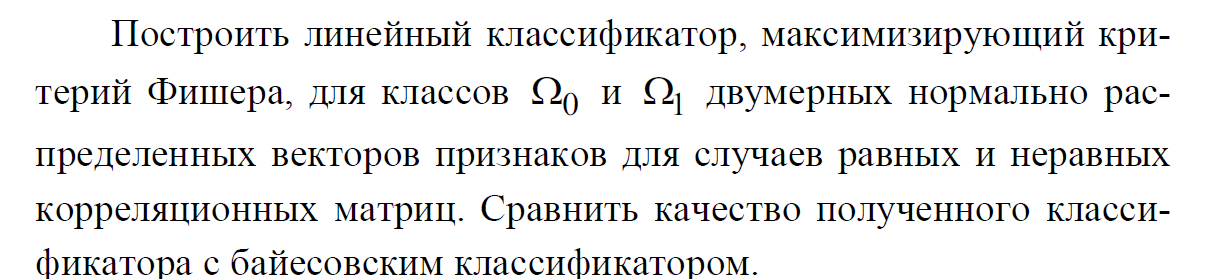

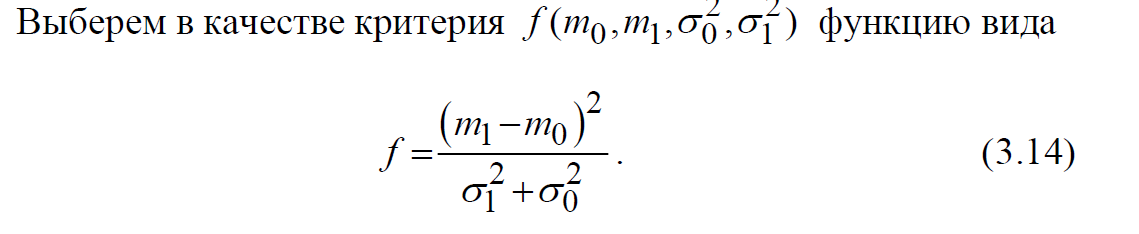

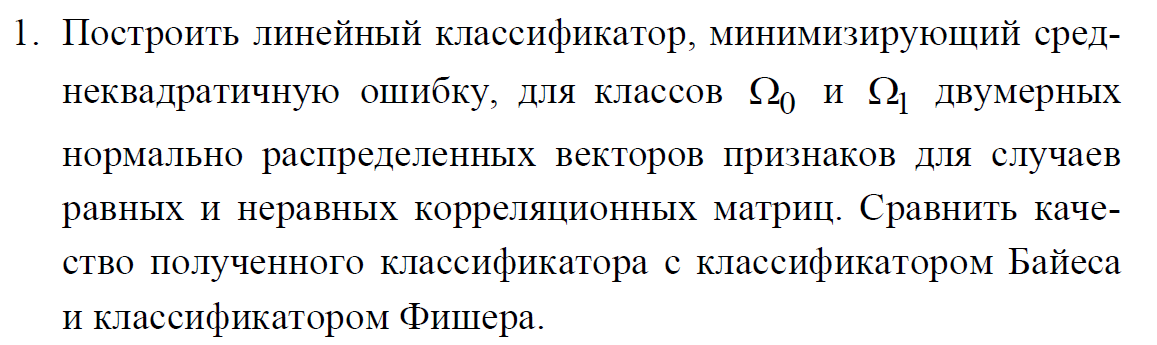
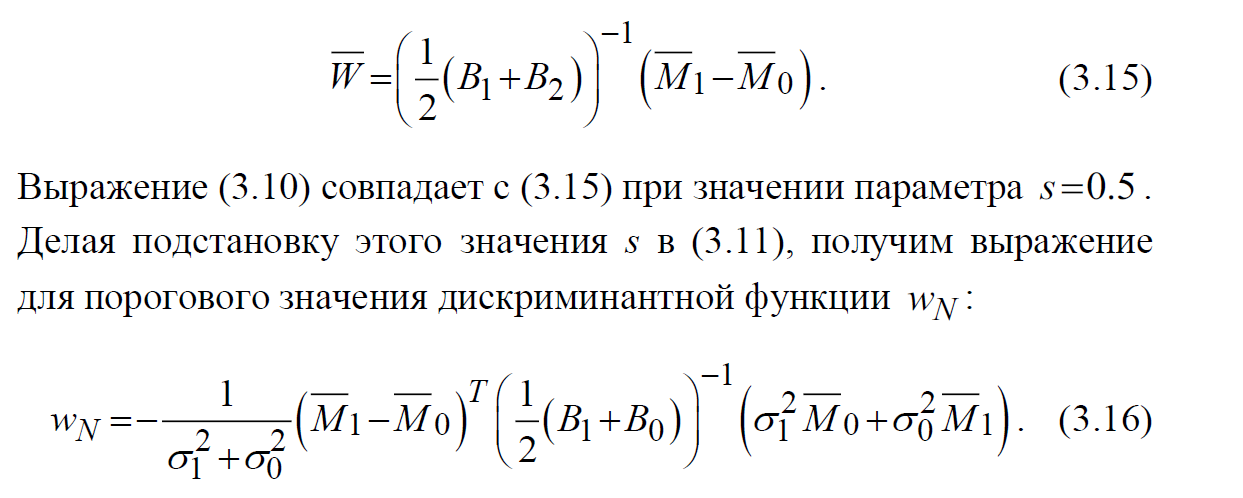

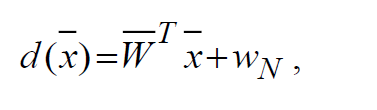

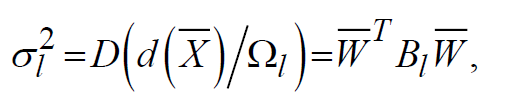

In [203]:
def Fisher(x, M0, B0, M1=0, B1=0, mode='same'):
    x1 = np.linspace(min(x[0]), max(x[0]),  len(x[0]))
    if mode == "same":
        B_ = np.linalg.inv(B0)
        W = (M1 - M0).T @ B_
        w_N = -0.5 * (M1 - M0).T @ B_ @ (M1 + M0)
        x2 = -(W[0][0] * x1 + w_N) / W[0][1]
        
    elif mode == "rather":
        B0_ = np.linalg.inv(B0)
        B1_ = np.linalg.inv(B1)
        W =  (M1 - M0).T @ np.linalg.inv(0.5 * (B1 + B0))
        s0 = W @ B0 @ W.T
        s1 = W @ B1 @ W.T
        w_N = (-1/(s0 + s1)) * (M1 - M0).T @ np.linalg.inv(0.5*(B0+B1)) @ (s0*M1 + s1*M0)
        
        x2 = -((W[0][0] ) * x1 + w_N)/ W[0][1]
    else:
        print('Mode error')
    print(W)
    
    return x1, x2, W, w_N

[[3.15789474 1.78362573]]


Text(0.5, 1.0, 'X1 и X2 с равной корреляцией')

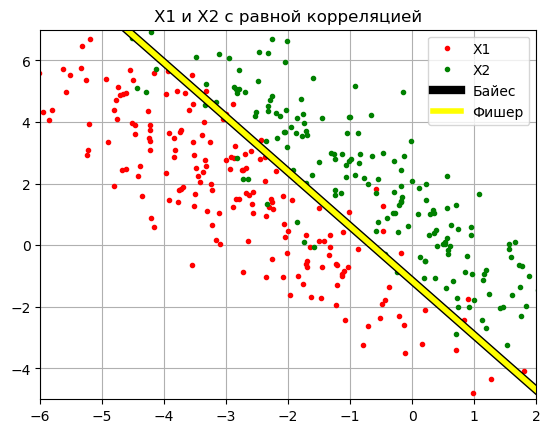

In [172]:
dir = "./vectors/"
M1 = np.load(dir + 'M_1.npy')
M2 = np.load(dir + 'M_2.npy')
B = np.load(dir + 'B.npy')

x1_1 = np.load(dir + 'x1_1.npy')
x1_2 = np.load(dir + 'x1_2.npy')

x = np.hstack((x1_1, x1_2))

x1, y_baies, a, b = classBaies(x, B, M1, M2)
x1, y_fisher, a, b = Fisher(x = x, M0 = M1, B0 = B, M1 = M2, mode='same')

plt.plot(x1_1[0,:], x1_1[1,:], color='red', marker='.', linestyle='none')  # plot saved and loaded data
plt.plot(x1_2[0,:], x1_2[1,:], color='green', marker='.', linestyle='none')  # plot saved and loaded data
plt.plot(x1, y_baies[0], color='black', linewidth = 6)
plt.plot(x1, y_fisher[0], color='yellow', linewidth = 4)
plt.xlim(-6, 2)
plt.ylim(-5, 7)
plt.grid(True)

plt.legend(['X1', 'X2', 'Байес', 'Фишер'])
plt.title('X1 и X2 с равной корреляцией')

[[ 4.18193935 -5.48150616]]


Text(0.5, 1.0, 'X1 и X2 с разной корреляцией')

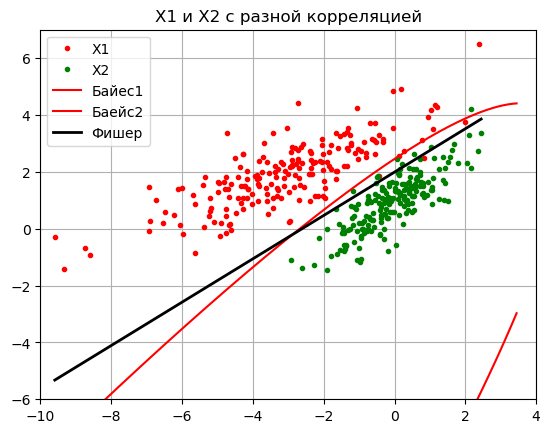

In [204]:
dir = "./vectors/"
M1 = np.load(dir + 'M_1.npy')
M2 = np.load(dir + 'M_2.npy')

B1 = np.load(dir + 'B_1.npy')
B2 = np.load(dir + 'B_2.npy')

x2_1 = np.load(dir + 'x2_1.npy')
x2_2 = np.load(dir + 'x2_2.npy')

x = np.hstack((x2_1, x2_2))

x12, y12, d12 = classBaiesKvadratic(x, B1, B2, M1, M2)
x1, y_fisher, a, b = Fisher(x = x, M0 = M1, B0 = B1, M1 = M2, B1 = B2, mode='rather')

plt.plot(x2_1[0,:], x2_1[1,:], color='red', marker='.', linestyle='none')  # plot saved and loaded data
plt.plot(x2_2[0,:], x2_2[1,:], color='green', marker='.', linestyle='none')  # plot saved and loaded data
plt.plot(x12, y12, color='red')
plt.plot(x12, d12, color='red')
plt.plot(x1, y_fisher[0], color='black', linewidth = 2)
plt.xlim(-10, 4)
plt.ylim(-6, 7)
plt.grid(True)

plt.legend(['X1', 'X2', 'Байес1', 'Баейс2', 'Фишер'])
plt.title('X1 и X2 с разной корреляцией')

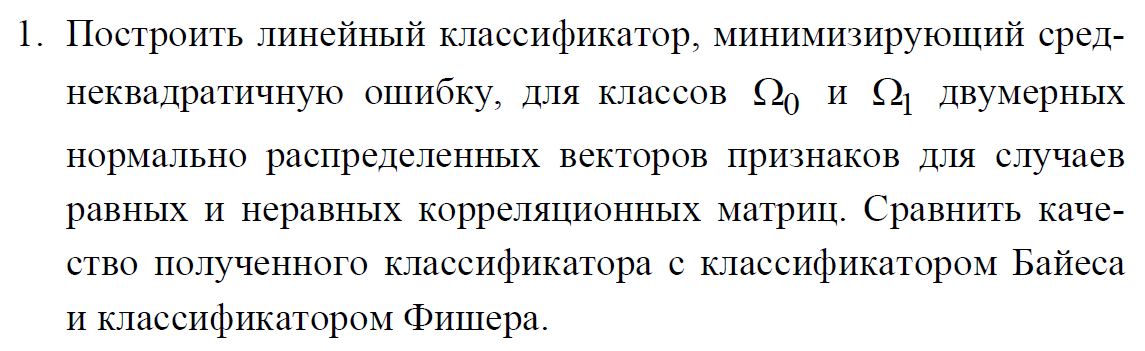